データの確認

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
train = pd.read_csv('mine_origin.csv')
# test = pd.read_csv('output_test.csv')

# データサイズの確認
print(f'Train shape: {train.shape}')# Test shape: {test.shape}')

# 先頭行の出力
train.head()
# test.head()

Train shape: (338, 4)


,Voltage,High,Soiltype,Class
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


統計量の確認

In [13]:
train.describe(include='all')
# test.describe(include='all')

,Voltage,High,Soiltype,Class
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


相関関係の確認

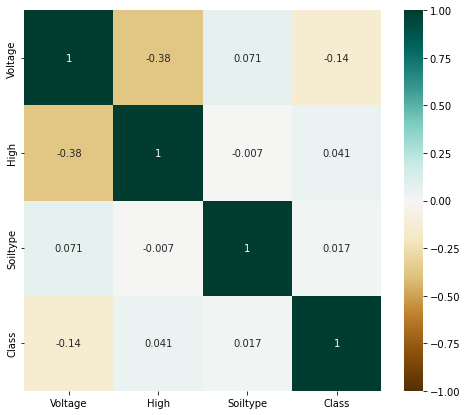

In [14]:
#変数間の相関関係のヒートマップ
fig = plt.figure(figsize=(8,7))
ax = sns.heatmap(train.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1)

#カテゴリ変数とラベルの関係
# categorical_feature = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
# for feature_name in categorical_feature:
#     fig = plt.figure(figsize=(30,5))
#     plt.xticks(rotation=45, ha="right")
#     ax = sns.countplot(x=feature_name, hue='>50K, <=50K.', data=train)
plt.show()

欠損値とクラスの関係（欠損値がある場合はP.94参照）

In [15]:
print(f'Null of Train: {(train.isnull().sum())}')
# print(f'Null of Test: {(test.isnull().sum())}')

Null of Train: Voltage     0
High        0
Soiltype    0
Class       0
dtype: int64


前処理

In [16]:
from sklearn.preprocessing import OrdinalEncoder

# # カテゴリカル変数の定義
# categorical_feature = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

# # 特徴量エンジニアリング
# train = train.dropna(subset=['workclass', 'occupation', 'native-country']) #欠損値があるカラムがあれば指定
# test = test.dropna(subset=['workclass', 'occupation', 'native-country']) #欠損値があるカラムがあれば指定

# df = pd.concat([train, test])
df = train
oe = OrdinalEncoder()
# df[categorical_feature] = oe.fit_transform(df[categorical_feature]).astype(int)

# df['>50K, <=50K.'] = df['>50K, <=50K.'].replace({' <=50K': 0, ' >50K': 1})
# df['>50K, <=50K.'] = df['>50K, <=50K.'].replace({' <=50K.': 0, ' >50K.': 1})

# データの正規化
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df = df.rename(columns={'Class': 'target'})

df['target'] = pd.factorize(df['target'])[0]
df_target = df['target']
df_without_target = df.drop(columns=['target'])

# Fit and transform the data without the target column
# df_without_target_scaled = pd.DataFrame(scaler.fit_transform(df_without_target), columns = df_without_target.columns)
from sklearn import preprocessing
df_without_target_scaled = pd.DataFrame(preprocessing.scale(df_without_target), columns=df_without_target.columns)

# Combine the target column and the scaled data
df_scaled = pd.concat([df_without_target_scaled, df_target], axis=1)

df_scaled.to_csv('mine.csv', index=False)
# train = df[df['Survived'].notnull()]#ラベルに欠損値がある場合
# test = df[df['Survived'].notnull()].drop(columns=['Survived'])#ラベルに欠損値がある場合